In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DP.csv to DP.csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['DP.csv']))

In [ ]:
df1.shape

(720, 18)

In [ ]:
X= df1[['Hs','Ht','Hd','Hr','Cv','FF','FD','SD','SA','FSR','RT','C_E','P_E','TCE','tc','fn']]
y = df1['Workload']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 3, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 3, 1, 2, 3, 1, 3, 2, 1,
       1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 3, 2, 3, 3, 1, 1, 1,
       3, 3, 1, 1, 2, 2, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1, 1, 3, 3, 2, 2, 2,
       1, 3, 3, 1, 2, 3, 2, 2, 2, 1, 3, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 3,
       2, 2, 1, 3, 2, 3, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 2, 1, 3, 2, 3, 3,
       1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 1, 2, 3, 1, 1, 3, 3, 2, 2, 2, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[59  0  0]
 [ 0 39  0]
 [ 0  1 45]]


0.9930555555555556

In [ ]:
X_train

array([[-0.13691056, -0.72632629, -0.68122365, ...,  0.57605157,
         0.59797294,  0.59797294],
       [-0.07953641, -0.60682617, -0.47241264, ..., -0.56477474,
        -0.11623914, -0.11623914],
       [-1.90844236,  0.22728797, -0.63182186, ..., -2.79245988,
        -2.75622745, -2.75622745],
       ...,
       [ 1.3823692 ,  0.82216895,  1.51974484, ...,  0.86435297,
         0.8850495 ,  0.8850495 ],
       [ 0.74930126, -0.85026426, -0.37308373, ..., -0.12827002,
         0.76441978,  0.76441978],
       [ 1.99881025,  0.03400969,  2.32344786, ...,  0.95044065,
         0.97077143,  0.97077143]])

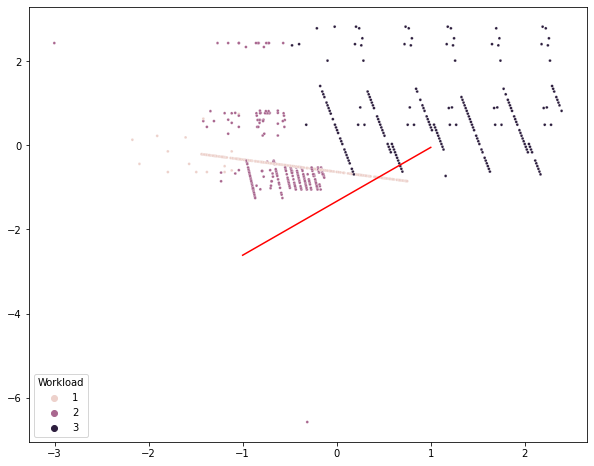

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);
w = classifier.coef_[0]         
b = classifier.intercept_[0]      
x_points = np.linspace(-1, 1)    
y_points = -(w[0] / w[1]) * x_points - b / w[1] 
plt.plot(x_points, y_points, c='r');